In [19]:
import pandas as pd
import numpy as np
# Load the CSV file
df = pd.read_csv(r'C:\codeverse\EatWell\dataset\scraped_data.csv')
df.head()
df.columns
df.shape

(1384, 10)

In [20]:
df = df.drop_duplicates()


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            1302 non-null   object
 1   category        1302 non-null   object
 2   Protein         1232 non-null   object
 3   Carbohydrates   1236 non-null   object
 4   Sugar           1290 non-null   object
 5   Fat             1229 non-null   object
 6   Fiber           1200 non-null   object
 7   Sodium          1226 non-null   object
 8   nutrient_grade  1302 non-null   object
 9   allergen        1302 non-null   object
dtypes: object(10)
memory usage: 111.9+ KB


In [22]:
df.isna().sum()


name                0
category            0
Protein            70
Carbohydrates      66
Sugar              12
Fat                73
Fiber             102
Sodium             76
nutrient_grade      0
allergen            0
dtype: int64

In [23]:
numeric_cols = ["Protein", "Carbohydrates", "Sugar", "Fat", "Sodium"]

# Function to clean and convert to float
def clean_numeric(value):
    if isinstance(value, str):
        value = value.replace(" g", "").replace("<", "").replace("?", "").strip()
        if value.lower() in ["", "not available", "+2%", "+6%", "-2%", "-43%"]:  # Handle non-numeric cases
            return None
    return pd.to_numeric(value, errors="coerce")

# Apply cleaning function to all numeric columns
df[numeric_cols] = df[numeric_cols].applymap(clean_numeric)

# Fill missing values with mode
for col in numeric_cols:
    mode_value = df[col].mode()[0]  # Get mode
    df[col].fillna(mode_value, inplace=True)

# Print cleaned data
print(df.dtypes)  # Check types
print(df)  # View final DataFrame

name               object
category           object
Protein           float64
Carbohydrates     float64
Sugar             float64
Fat               float64
Fiber              object
Sodium            float64
nutrient_grade     object
allergen           object
dtype: object
                                                   name  category  Protein  \
0                                Gaufres Côte d’Or - Lu  biscuits     5.08   
1                             Oreo - Cadbury - 43.75g g  biscuits     0.00   
2     masala munch 10rs - PepsiCo India holdings Pvt...  biscuits     6.40   
3                             BOURBON - Britannia - 60g  biscuits     5.00   
4                               Parle-G gold 75g - 50 g  biscuits     6.90   
...                                                 ...       ...      ...   
1379                   Beetroot chips Mint - Krunchillo     chips     8.03   
1380                         CORN CHips - Charlie - 170     chips     0.00   
1381                    

C:\Users\rugved\AppData\Local\Temp\ipykernel_3832\521861018.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[numeric_cols] = df[numeric_cols].applymap(clean_numeric)
C:\Users\rugved\AppData\Local\Temp\ipykernel_3832\521861018.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


In [24]:
df.shape

(1302, 10)

In [25]:
df.head()

,name,category,Protein,Carbohydrates,Sugar,Fat,Fiber,Sodium,nutrient_grade,allergen
0,Gaufres Côte d’Or - Lu,biscuits,5.08,59.3,35.2,0.424,17.8 g,0.042,Average impact of products of the same categor...,"Allergens: Apple, Orange"
1,Oreo - Cadbury - 43.75g g,biscuits,0.00,0.0,0.0,0.000,NaN,0.000,Average impact of products of the same categor...,"Allergens: Gluten, Soybeans, Sulphur dioxide a..."
2,masala munch 10rs - PepsiCo India holdings Pvt...,biscuits,6.40,56.8,0.4,0.100,0 g,0.250,Average impact of products of the same categor...,"Allergens: Milk, Nuts, Sesame seeds, Soybeans,..."
3,BOURBON - Britannia - 60g,biscuits,5.00,72.7,35.1,10.100,?,0.298,Average impact of products of the same categor...,Allergens: Soybeans
4,Parle-G gold 75g - 50 g,biscuits,6.90,77.3,25.5,6.000,0 g,0.740,Average impact of products of the same categor...,"Allergens: Gluten, Milk"


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1302 non-null   object 
 1   category        1302 non-null   object 
 2   Protein         1302 non-null   float64
 3   Carbohydrates   1302 non-null   float64
 4   Sugar           1302 non-null   float64
 5   Fat             1302 non-null   float64
 6   Fiber           1200 non-null   object 
 7   Sodium          1302 non-null   float64
 8   nutrient_grade  1302 non-null   object 
 9   allergen        1302 non-null   object 
dtypes: float64(5), object(5)
memory usage: 111.9+ KB


In [27]:
# Fill NaN values with mode for each column
columns=["Protein", "Carbohydrates", "Sugar", "Fat", "Fiber", "Sodium"]
for col in columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\rugved\AppData\Local\Temp\ipykernel_3832\3150811384.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [28]:
df.shape

(1302, 10)

In [29]:
df.drop(columns="Fiber",inplace=True)

In [30]:
df.head(5)

,name,category,Protein,Carbohydrates,Sugar,Fat,Sodium,nutrient_grade,allergen
0,Gaufres Côte d’Or - Lu,biscuits,5.08,59.3,35.2,0.424,0.042,Average impact of products of the same categor...,"Allergens: Apple, Orange"
1,Oreo - Cadbury - 43.75g g,biscuits,0.00,0.0,0.0,0.000,0.000,Average impact of products of the same categor...,"Allergens: Gluten, Soybeans, Sulphur dioxide a..."
2,masala munch 10rs - PepsiCo India holdings Pvt...,biscuits,6.40,56.8,0.4,0.100,0.250,Average impact of products of the same categor...,"Allergens: Milk, Nuts, Sesame seeds, Soybeans,..."
3,BOURBON - Britannia - 60g,biscuits,5.00,72.7,35.1,10.100,0.298,Average impact of products of the same categor...,Allergens: Soybeans
4,Parle-G gold 75g - 50 g,biscuits,6.90,77.3,25.5,6.000,0.740,Average impact of products of the same categor...,"Allergens: Gluten, Milk"


In [31]:
df["nutrient_grade"].unique()

array(['Average impact of products of the same category: B (Score: 62/100)',
       'Average impact of products of the same category: C (Score: 57/100)',
       'Average impact of products of the same category: A (Score: 87/100)',
       'Average impact of products of the same category: B (Score: 70/100)',
       'Processed foods', 'Nutri-Score E',
       'Average impact of products of the same category: B (Score: 67/100)',
       'Average impact of products of the same category: A (Score: 75/100)',
       'Average impact of products of the same category: B (Score: 69/100)',
       'Not available',
       'Average impact of products of the same category: C (Score: 47/100)',
       'Average impact of products of the same category: A (Score: 78/100)',
       'Average impact of products of the same category: C (Score: 52/100)',
       'Ultra-processed foods',
       'Average impact of products of the same category: C (Score: 54/100)',
       'Nutri-Score D', 'Green-Score C', 'Green-Score 

In [32]:
import re
import pandas as pd

# Function to extract grade and nutrient score
def extract_grade_score(text):
    if pd.isna(text):
        return pd.Series([None, None])

    # Extract from "Average impact of products of the same category: X (Score: Y/100)"
    match = re.search(r"Average impact of products of the same category: ([A-E]) \(Score: (\d+)/100\)", text)
    if match:
        return pd.Series([match.group(1), float(match.group(2))])

    # Extract from "Nutri-Score X"
    match = re.search(r"Nutri-Score ([A-E])", text)
    if match:
        return pd.Series([match.group(1), None])  # No score available in this case

    return pd.Series([None, None])

# Apply function to extract grade and nutrient score
df[["grade", "nutrient_score"]] = df["nutrient_grade"].apply(extract_grade_score)

# Convert nutrient_score column to float (handles None values automatically)
df["nutrient_score"] = df["nutrient_score"].astype(float)

# Display results
print(df)


                                                   name  category  Protein  \
0                                Gaufres Côte d’Or - Lu  biscuits     5.08   
1                             Oreo - Cadbury - 43.75g g  biscuits     0.00   
2     masala munch 10rs - PepsiCo India holdings Pvt...  biscuits     6.40   
3                             BOURBON - Britannia - 60g  biscuits     5.00   
4                               Parle-G gold 75g - 50 g  biscuits     6.90   
...                                                 ...       ...      ...   
1379                   Beetroot chips Mint - Krunchillo     chips     8.03   
1380                         CORN CHips - Charlie - 170     chips     0.00   
1381                         RAGI CHIPS - Charlie - 170     chips     0.00   
1382         SALTED YELLOW BANANA CHIPS - Charlie - 150     chips     0.00   
1383                   MAKINO NACHO CHIP ROASTED MASALA     chips     0.00   

      Carbohydrates  Sugar     Fat  Sodium  \
0              59

In [33]:
df.isna().sum()

name                0
category            0
Protein             0
Carbohydrates       0
Sugar               0
Fat                 0
Sodium              0
nutrient_grade      0
allergen            0
grade             495
nutrient_score    680
dtype: int64

In [34]:
df.head()

,name,category,Protein,Carbohydrates,Sugar,Fat,Sodium,nutrient_grade,allergen,grade,nutrient_score
0,Gaufres Côte d’Or - Lu,biscuits,5.08,59.3,35.2,0.424,0.042,Average impact of products of the same categor...,"Allergens: Apple, Orange",B,62.0
1,Oreo - Cadbury - 43.75g g,biscuits,0.00,0.0,0.0,0.000,0.000,Average impact of products of the same categor...,"Allergens: Gluten, Soybeans, Sulphur dioxide a...",C,57.0
2,masala munch 10rs - PepsiCo India holdings Pvt...,biscuits,6.40,56.8,0.4,0.100,0.250,Average impact of products of the same categor...,"Allergens: Milk, Nuts, Sesame seeds, Soybeans,...",A,87.0
3,BOURBON - Britannia - 60g,biscuits,5.00,72.7,35.1,10.100,0.298,Average impact of products of the same categor...,Allergens: Soybeans,C,57.0
4,Parle-G gold 75g - 50 g,biscuits,6.90,77.3,25.5,6.000,0.740,Average impact of products of the same categor...,"Allergens: Gluten, Milk",B,70.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1383
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1302 non-null   object 
 1   category        1302 non-null   object 
 2   Protein         1302 non-null   float64
 3   Carbohydrates   1302 non-null   float64
 4   Sugar           1302 non-null   float64
 5   Fat             1302 non-null   float64
 6   Sodium          1302 non-null   float64
 7   nutrient_grade  1302 non-null   object 
 8   allergen        1302 non-null   object 
 9   grade           807 non-null    object 
 10  nutrient_score  622 non-null    float64
dtypes: float64(6), object(5)
memory usage: 122.1+ KB


In [36]:
df["nutrient_score"] = df["nutrient_score"].astype(float)
df.drop(columns="nutrient_grade",inplace=True)



In [37]:
df.head()

,name,category,Protein,Carbohydrates,Sugar,Fat,Sodium,allergen,grade,nutrient_score
0,Gaufres Côte d’Or - Lu,biscuits,5.08,59.3,35.2,0.424,0.042,"Allergens: Apple, Orange",B,62.0
1,Oreo - Cadbury - 43.75g g,biscuits,0.00,0.0,0.0,0.000,0.000,"Allergens: Gluten, Soybeans, Sulphur dioxide a...",C,57.0
2,masala munch 10rs - PepsiCo India holdings Pvt...,biscuits,6.40,56.8,0.4,0.100,0.250,"Allergens: Milk, Nuts, Sesame seeds, Soybeans,...",A,87.0
3,BOURBON - Britannia - 60g,biscuits,5.00,72.7,35.1,10.100,0.298,Allergens: Soybeans,C,57.0
4,Parle-G gold 75g - 50 g,biscuits,6.90,77.3,25.5,6.000,0.740,"Allergens: Gluten, Milk",B,70.0


In [38]:
df.shape

(1302, 10)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1302 non-null   object 
 1   category        1302 non-null   object 
 2   Protein         1302 non-null   float64
 3   Carbohydrates   1302 non-null   float64
 4   Sugar           1302 non-null   float64
 5   Fat             1302 non-null   float64
 6   Sodium          1302 non-null   float64
 7   allergen        1302 non-null   object 
 8   grade           807 non-null    object 
 9   nutrient_score  622 non-null    float64
dtypes: float64(6), object(4)
memory usage: 111.9+ KB


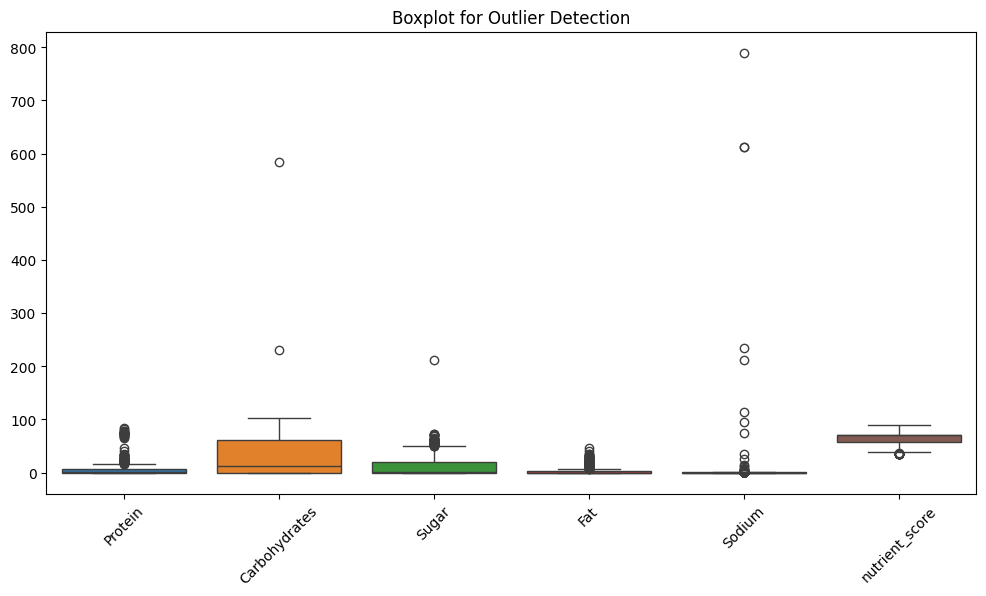

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
num_cols = df.select_dtypes(include=['number'])

# Plot boxplots for all numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=num_cols)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()


In [41]:
import numpy as np
import pandas as pd

# Function to replace outliers with the mean
def replace_outliers_with_mean(series):
    Q1 = series.quantile(0.25)  # First Quartile
    Q3 = series.quantile(0.75)  # Third Quartile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with the mean
    mean_value = series[(series >= lower_bound) & (series <= upper_bound)].mean()
    series = np.where((series < lower_bound) | (series > upper_bound), mean_value, series)
    
    return series
num_cols = ["Protein", "Carbohydrates", "Sugar", "Fat", "Sodium"]
df[num_cols] = df[num_cols].apply(replace_outliers_with_mean)


In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [49]:
df.head()

,name,category,Protein,Carbohydrates,Sugar,Fat,Sodium,allergen,grade,nutrient_score
0,Gaufres Côte d’Or - Lu,biscuits,0.315528,0.575728,0.699801,0.056533,0.055409,"Allergens: Apple, Orange",B,62.0
1,Oreo - Cadbury - 43.75g g,biscuits,0.000000,0.000000,0.000000,0.000000,0.000000,"Allergens: Gluten, Soybeans, Sulphur dioxide a...",C,57.0
2,masala munch 10rs - PepsiCo India holdings Pvt...,biscuits,0.397516,0.551456,0.007952,0.013333,0.329815,"Allergens: Milk, Nuts, Sesame seeds, Soybeans,...",A,87.0
3,BOURBON - Britannia - 60g,biscuits,0.310559,0.705825,0.697813,0.071914,0.393140,Allergens: Soybeans,C,57.0
4,Parle-G gold 75g - 50 g,biscuits,0.428571,0.750485,0.506958,0.800000,0.976253,"Allergens: Gluten, Milk",B,70.0


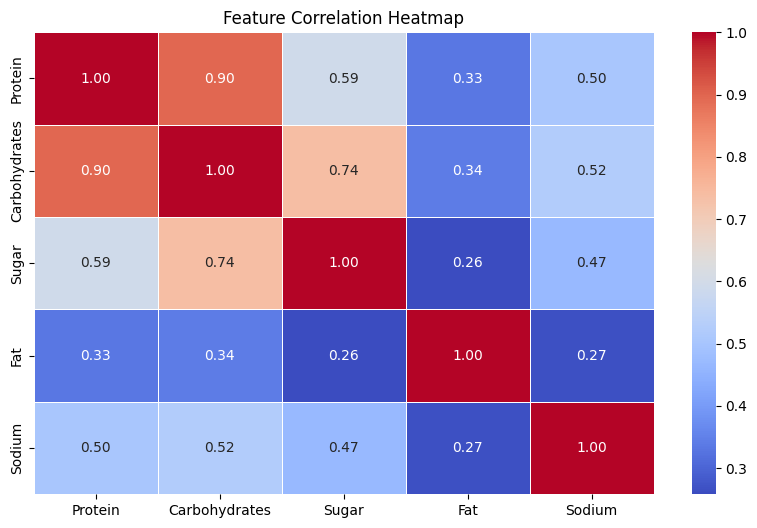

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df[num_cols].corr()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Show the plot
plt.title("Feature Correlation Heatmap")
plt.show()


In [46]:
df = df.dropna(subset=["nutrient_score"])  # Ensure y has no NaN values

# If using 'grade' instead of 'nutrient_score', handle that column too
df = df.dropna(subset=["grade"])

In [68]:
df["name"].values

array(['Gaufres Côte d’Or - Lu', 'Oreo - Cadbury - 43.75g g',
       'masala munch 10rs - PepsiCo India holdings Pvt.Ltd - 44g',
       'BOURBON - Britannia - 60g', 'Parle-G gold 75g - 50\xa0g',
       'Parle-G - 100g', 'Marie gold - Britannia - 73\xa0g',
       'Jimjam 57g (57) - Britannia - 57\xa0g',
       'Nutri Choice - Britannia Digestive - 100\xa0g', 'Puffcorn',
       'Brit 50-50 maska chaska 40g (20) - Britannia',
       'Sandwich Biscuit - Oreo',
       'Oreo Original - Oreo Biscuits - 123g g',
       'Hide & Seek - PARLE - 120g', 'Hide & Seek - Parle - 100g',
       'Parle-G - 250', 'Dark Fantasy Choco Fills - Sunfeast - 300g',
       'Little Hearts Classic - Britannia - 75g',
       'Marie gold - Britannia', 'Good day - Britannia',
       'Tiger Krunch ChocoChips - Britannia - 63\xa0g',
       'Brit bourbon 150g (sys) - Britannia',
       'Milk Bikis - Britannia - 66.8',
       'Kitkat mini chocolate coated wafer',
       'Jimjam - Britannia - 138\xa0g',
       'Good Day - 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import cdist

# Load Data (Ensure df has 'name', 'category', 'nutrient_score', and nutrient columns)
num_cols = ["Protein", "Carbohydrates", "Sugar", "Fat", "Sodium"]

# Fill missing grades with "Unknown"
df["grade"] = df["grade"].fillna("Unknown")

# **Step 1: Normalize Nutrient Values with MinMaxScaler**
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# **Step 2: Train Nearest Neighbors Model**
knn = NearestNeighbors(n_neighbors=10, metric='euclidean')  # Increase neighbors to 10 for better selection
knn.fit(df[num_cols])  # Train on normalized nutrient values

# **Step 3: Define a Weighted Health Score Function**
def compute_health_score(product):
    """
    Calculate a custom health score based on weighted factors.
    Lower Sugar, Fat, and Sodium -> Higher score
    Higher Protein -> Higher score
    """
    weight_factors = {
        "Protein": 0.4,         # Higher is better
        "Carbohydrates": 0.1,   # Neutral
        "Sugar": -0.3,          # Lower is better
        "Fat": -0.2,            # Lower is better
        "Sodium": -0.3          # Lower is better
    }
    
    # Calculate weighted sum
    score = sum(product[nutrient] * weight for nutrient, weight in weight_factors.items())
    return score

# **Step 4: Apply Health Score to Dataset**
df["health_score"] = df.apply(compute_health_score, axis=1)

# **Step 5: Recommendation Function**
def recommend_healthier_alternative(product_name, df, knn, num_neighbors=10):
    if product_name not in df["name"].values:
        return f"Product '{product_name}' not found in dataset."

    # **Step 6: Get Product Info**
    product = df[df["name"] == product_name]
    category = product["category"].values[0]  
    nutrient_score = product["nutrient_score"].values[0]
    product_health_score = product["health_score"].values[0]

    # **Step 7: Find Nearest Neighbors**
    distances, indices = knn.kneighbors(product[num_cols])
    similar_products = df.iloc[indices[0]]

    # **Step 8: Filter by Category**
    alternatives = similar_products[similar_products["category"] == category]

    # **Step 9: Find Healthier Alternatives Based on Weighted Health Score**
    healthier_alternatives = alternatives[alternatives["health_score"] > product_health_score]

    # **Step 10: Select the Best Alternative**
    if healthier_alternatives.empty:
        best_alternative = alternatives.sort_values(by="health_score", ascending=False).head(1)
        return f"No strict healthier alternative found. But you can try:\n{best_alternative[['name', 'health_score', 'category', 'grade']]}"
    
    return healthier_alternatives.sort_values(by="health_score", ascending=False)[["name", "health_score", "category", "grade"]].head(3)

# **Step 11: Example Usage**
#Popped potato chips Italian Cheese flavour
print(recommend_healthier_alternative("Popped potato chips Italian Cheese flavour", df, knn))


                                                name  health_score category  \
1264              Potato Chips - Lay's Gourmet - 80g      0.248584    chips   
1252  Gourmet limed and cracked pepper chips - Lay's      0.239945    chips   
1206              balaji wafers chataka pataka - 25g      0.236807    chips   

     grade  
1264     A  
1252     A  
1206     A  


In [ ]:
print(df.isna().sum())


name                0
category            0
Protein             0
Carbohydrates       0
Sugar               0
Fat                 0
Sodium              0
allergen            0
grade             680
nutrient_score    680
dtype: int64


biscuits
No healthier alternative found for 'Uncle Chipps Plain Salty'.
